<a href="https://colab.research.google.com/github/vnewsome/project_chd/blob/main/ML_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DS3001: Machine Learning Project 2


In [32]:
! git clone https://github.com/vnewsome/project_chd

fatal: destination path 'project_chd' already exists and is not an empty directory.


In [1]:
# load import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# NOTE: training data = data; test data = tdata
# load the training data
data = pd.read_csv("fhs_train.csv", low_memory=False)

In [3]:
# examining training data
data.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [4]:
# looking at each variable, cleaning if necessary

column_dtypes = data.dtypes   # examining the data types
print(column_dtypes)

# variables in the TRAINING data that contain nans: education, cigsPerDay, BPMeds, totChol, glucose
glucose = data["glucose"]
glucose.unique()

Unnamed: 0           int64
sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose            float64
TenYearCHD           int64
dtype: object


array([ 87.,  77.,  nan,  75.,  74., 104.,  69.,  90.,  91.,  81.,  89.,
        86.,  84.,  73.,  95.,  65., 103.,  76.,  85.,  92.,  72.,  62.,
        93.,  68.,  67., 122., 102.,  79.,  66.,  83.,  78.,  64.,  63.,
        58.,  71., 115.,  70.,  96.,  60.,  82.,  94.,  88., 167., 117.,
       215.,  48., 108., 268., 100.,  80.,  99., 135.,  97.,  55., 274.,
        40., 118.,  47.,  56., 112., 248., 107., 105.,  61., 260., 170.,
       148., 120., 225.,  98.,  59., 332., 110., 206., 129.,  57., 114.,
       101., 113., 111., 127., 121.,  45., 147.,  50., 244., 106., 394.,
       173., 116., 137., 145., 123.,  44., 172.,  54., 142., 348., 119.,
       320.,  53., 136., 210.,  43., 144., 292., 125., 294., 130., 131.,
       255., 160.,  52., 207., 297., 216., 166., 109., 126., 235., 140.,
       270., 250., 193., 256., 150., 202., 254., 370., 191., 186.])

In [5]:
# determining how many NaNs are in the data
nan_columns = data.isnull().sum()
print(nan_columns)
total_columns = data.count()
print(total_columns)

# glucose is the only column with a high percentage of nans (~9%)
# NOTE: Nan values are left in for now** they will be removed if there is a problem later on

Unnamed: 0           0
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64
Unnamed: 0         3180
sex                3180
age                3180
education          3095
currentSmoker      3180
cigsPerDay         3156
BPMeds             3143
prevalentStroke    3180
prevalentHyp       3180
diabetes           3180
totChol            3141
sysBP              3180
diaBP              3180
BMI                3165
heartRate          3180
glucose            2895
TenYearCHD         3180
dtype: int64


In [6]:
# examining relationships between columns before building a model to identify patterns/correlations

# sex variable: 1 = male
# TenYearCHD: assuming 1 indicates an at risk individual (note: this was not noted in the data dictionary)
data.loc[:,['totChol','TenYearCHD'] ].groupby('TenYearCHD').describe()     # totChol and 10-year risk of CHD have a higher mean when compared to no risk

totChol                                                          
             count        mean        std    min    25%    50%    75%    max
TenYearCHD                                                                  
0           2660.0  234.699624  43.708817  113.0  204.0  232.0  260.0  696.0
1            481.0  247.114345  49.429131  107.0  214.0  243.0  273.0  600.0

In [7]:
data.loc[:,['BMI','TenYearCHD'] ].groupby('TenYearCHD').describe()

BMI                                                        
             count       mean       std    min    25%    50%    75%    max
TenYearCHD                                                                
0           2686.0  25.761102  4.029037  15.54  23.08  25.35  27.96  51.28
1            479.0  26.600355  4.598560  16.71  23.68  26.20  28.92  56.80

In [8]:
data.loc[:,['cigsPerDay','TenYearCHD'] ].groupby('TenYearCHD').describe()

cigsPerDay                                                 
                count       mean        std  min  25%  50%   75%   max
TenYearCHD                                                            
0              2671.0   8.726320  11.789079  0.0  0.0  0.0  20.0  70.0
1               485.0  10.315464  13.114147  0.0  0.0  0.0  20.0  60.0

In [9]:
data.loc[:,['age','TenYearCHD'] ].groupby('TenYearCHD').describe()     # possible relationship bw age and ten year CHD risk

age                                                   
             count       mean       std   min   25%   50%   75%   max
TenYearCHD                                                           
0           2693.0  48.813219  8.405781  32.0  42.0  48.0  55.0  70.0
1            487.0  54.172485  7.954541  35.0  48.0  55.0  61.0  70.0

In [10]:
# load the testing data
tdata = pd.read_csv("fhs_test.csv", low_memory=False)

In [11]:
# examining and cleaning the test data if necessary
tdata.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,674,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
1,4070,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
2,3150,0,44,2.0,1,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
3,1695,0,40,2.0,1,20.0,0.0,0,0,0,271.0,138.5,88.0,27.24,80.0,NaN,1
4,2692,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0


In [12]:
column_dtypes = tdata.dtypes   # examining the data types
print(column_dtypes)

Unnamed: 0           int64
sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [13]:
# looks like heartRate is a float in the test data but an int in the training data
# we'll go ahead and make sure they match up by changing the data type in the training data
data['heartRate'] = data['heartRate'].astype(float)
print(data['heartRate'].dtypes)

float64


In [14]:
# variables in the TEST data that contain nans: education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose

# determining how many NaNs are in the data
nan_columns = tdata.isnull().sum()
print(nan_columns)
total_columns = tdata.count()
print(total_columns)

# glucose has a higher proportion of Nans in the testing data ~10%

Unnamed: 0           0
sex                  0
age                  0
education           20
currentSmoker        0
cigsPerDay           5
BPMeds              16
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             11
sysBP                0
diaBP                0
BMI                  4
heartRate            1
glucose            103
TenYearCHD           0
dtype: int64
Unnamed: 0         1060
sex                1060
age                1060
education          1040
currentSmoker      1060
cigsPerDay         1055
BPMeds             1044
prevalentStroke    1060
prevalentHyp       1060
diabetes           1060
totChol            1049
sysBP              1060
diaBP              1060
BMI                1056
heartRate          1059
glucose             957
TenYearCHD         1060
dtype: int64


After examining the training data, no variables were observed to contain more than 10% nans. totChol, BMI, cigsPerDay, and age all could be interesting variables to model with, due to the correlation between increased values for these variables among individuals who developed CHD in ten years. This does not exclude other variables, but all of this subset could be helpful in predicting if an individual is likely to CHD. Linear models with these variables could likely provide useful prediction, especially if using variables which show a stronger grouping towards individuals who not develop CHD and individuals who do develop CHD. Note that BMI does not show as much variation between groups, but this is likely due to the smaller range of values for BMI, compared to totChol, cigsPerDay, and age.

After coercion: 
 count    3141.000000
mean      236.600764
std        44.847411
min       107.000000
25%       205.000000
50%       233.000000
75%       262.000000
max       696.000000
Name: totChol, dtype: float64 

Total Missings: 
 39 



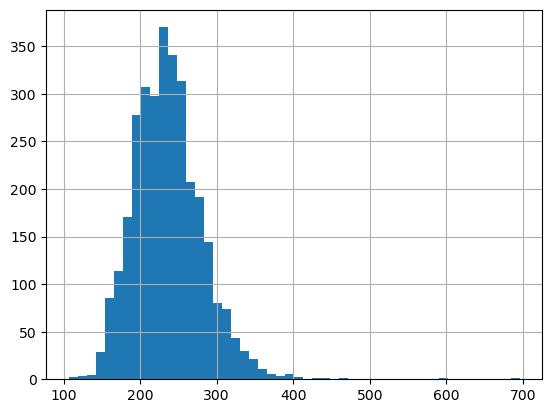

In [15]:
# NOTE: Nan values are left in for now** they will be removed if there is a problem later on
# There was a problem later on
data['totChol'].unique()
data['totChol_nan'] = data['totChol'].isnull()

print('After coercion: \n', data['totChol'].describe(),'\n')
data['totChol'].hist(bins = 50)
print('Total Missings: \n', sum(data['totChol_nan']),'\n')

After coercion: 
 count    3165.000000
mean       25.888117
std         4.130475
min        15.540000
25%        23.100000
50%        25.490000
75%        28.140000
max        56.800000
Name: BMI, dtype: float64 

Total Missings: 
 15 



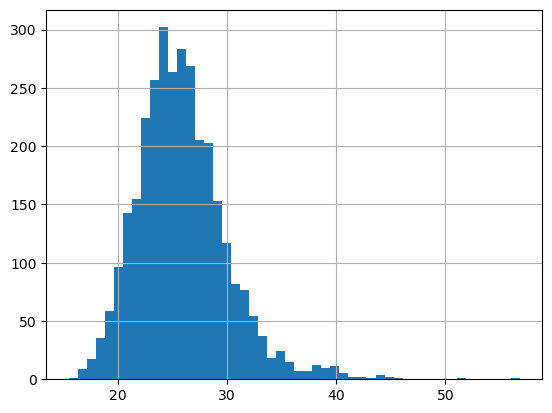

In [16]:
data['BMI'].unique()
data['BMI_nan'] = data['BMI'].isnull()

print('After coercion: \n', data['BMI'].describe(),'\n')
data['BMI'].hist(bins = 50)
print('Total Missings: \n', sum(data['BMI_nan']),'\n')

After coercion: 
 count    3156.000000
mean        8.970532
std        12.013704
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64 

Total Missings: 
 24 



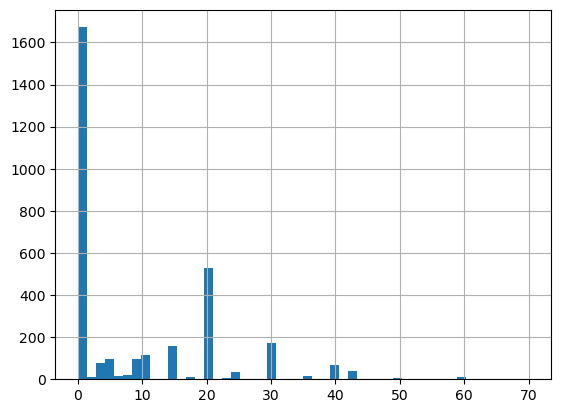

In [17]:
data['cigsPerDay'].unique()
data['cigsPerDay_nan'] = data['cigsPerDay'].isnull()

print('After coercion: \n', data['cigsPerDay'].describe(),'\n')
data['cigsPerDay'].hist(bins = 50)
print('Total Missings: \n', sum(data['cigsPerDay_nan']),'\n')

In [18]:
# Relatively few missings, so imputed values
data['totChol_impute'] = data['totChol'].fillna(data['totChol'].mean)
data['BMI_impute'] = data['BMI'].fillna(data['BMI'].mean)
data['cigsPerDay_impute'] = data['cigsPerDay'].fillna(data['cigsPerDay'].median)
data['education'] = data['education'].dropna()

data['totChol_impute'] = pd.to_numeric(data['totChol_impute'], errors='coerce')
data['BMI_impute'] = pd.to_numeric(data['BMI_impute'], errors='coerce')
data['cigsPerDay_impute'] = pd.to_numeric(data['cigsPerDay_impute'], errors='coerce')
data['education'] = pd.to_numeric(data['education'], errors='coerce')

In [19]:
data['age_scale'] = np.arcsinh(data['age'])

In [20]:
# linear model
from sklearn.linear_model import LinearRegression

vars = ['age_scale']
# other vars: 'totChol_impute','BMI_impute','cigsPerDay_impute'

X = data.loc[:,vars]
X.head()

,age_scale
0,4.753664
1,4.382183
2,4.644483
3,4.330906
4,4.454482


In [21]:
data['age_scale'].unique()

array([4.7536645 , 4.38218285, 4.64448334, 4.33090643, 4.45448248,
       4.71857858, 4.68221695, 4.54340794, 4.80408822, 4.77075644,
       4.85209129, 4.4999331 , 4.62506892, 4.83634489, 4.73627539,
       4.56445668, 4.5219067 , 4.78756118, 4.35687315, 4.66352808,
       4.58507159, 4.60527017, 4.47746592, 4.91270895, 4.40686794,
       4.86759362, 4.700563  , 4.2197239 , 4.24869926, 4.30424766,
       4.88285931, 4.43095849, 4.8203466 , 4.89789549, 4.27685896,
       4.18988423, 4.15912713, 4.94169344, 4.92730619])

In [22]:
y = data['TenYearCHD']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TenYearCHD, dtype: int64

In [23]:
reg = LinearRegression().fit(X, y)
print(reg.intercept_)
print(reg.coef_)
print(reg.score(X, y))

-1.9795718765916395
[0.46535258]
0.0500268926646269


Possibly a tree would work better? Even though most of our variables are numeric or able to be treated as such, perhaps a tree would be more fitting for predicting TenYearCHD, which is squarely a categorical variable.

**Classification Tree Regression:**

In [24]:
# dropping NAs from glucose in both the train and test data
data = data.dropna(subset=['glucose'])
tdata = tdata.dropna(subset=['glucose'])

# Relatively few missings, so imputed values
tdata['totChol_impute'] = tdata['totChol'].fillna(data['totChol'].mean)
tdata['BMI_impute'] = tdata['BMI'].fillna(data['BMI'].mean)
tdata['cigsPerDay_impute'] = tdata['cigsPerDay'].fillna(data['cigsPerDay'].median)
tdata['education'] = data['education'].dropna()

tdata['totChol_impute'] = pd.to_numeric(tdata['totChol_impute'], errors='coerce')
tdata['BMI_impute'] = pd.to_numeric(tdata['BMI_impute'], errors='coerce')
tdata['cigsPerDay_impute'] = pd.to_numeric(tdata['cigsPerDay_impute'], errors='coerce')
tdata['education'] = pd.to_numeric(tdata['education'], errors='coerce')

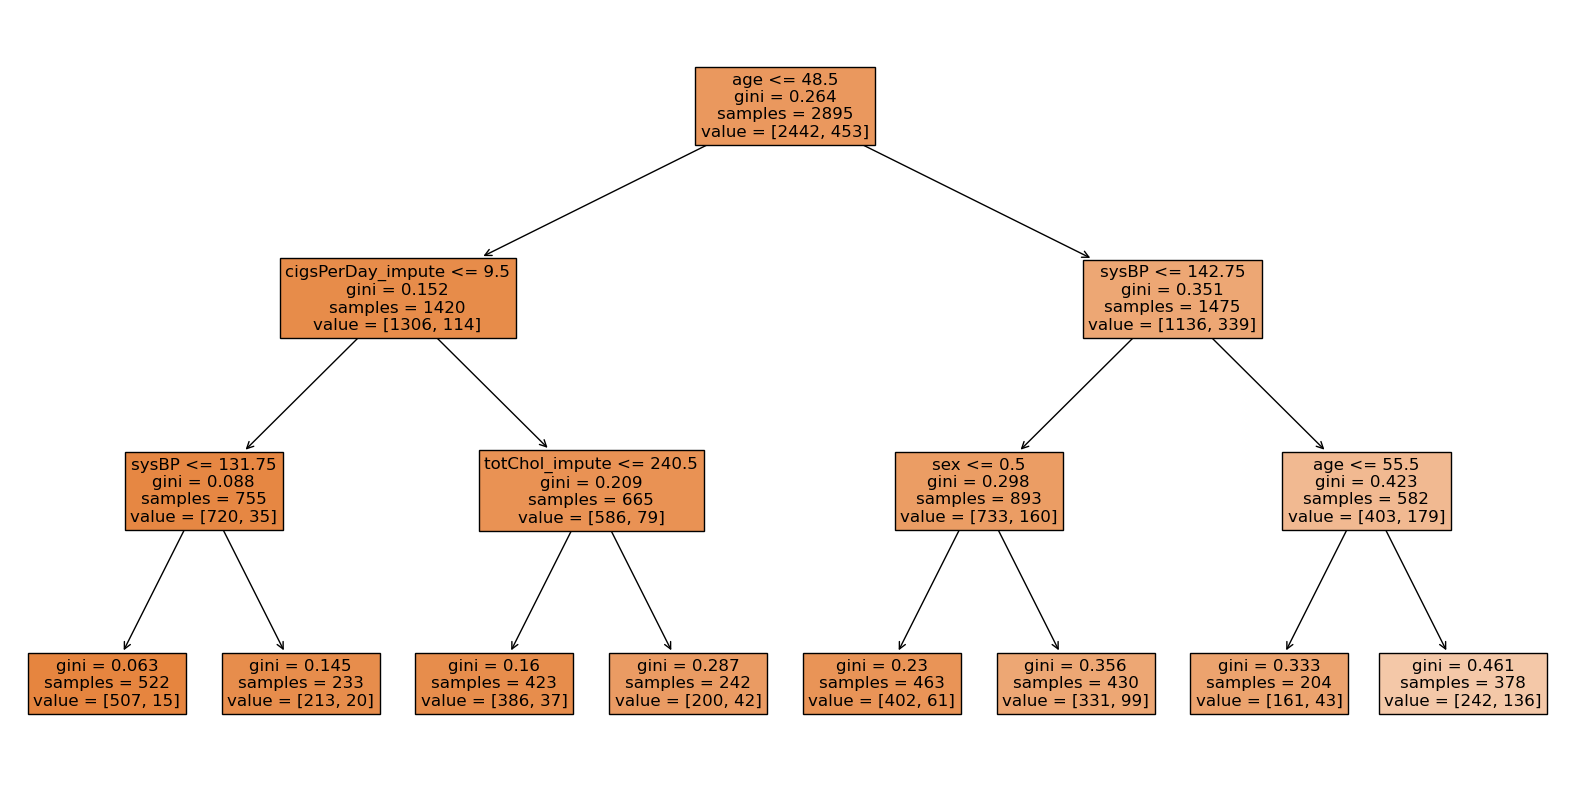

Tree rsq:  0.8526645768025078


In [25]:
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree #Import the tree classifier

# Process data:
y_train = data['TenYearCHD']
X_train = data.drop(['TenYearCHD','age_scale','cigsPerDay','BMI','totChol','BMI_nan','cigsPerDay_nan','totChol_nan'], axis=1)
var_list = list(X_train.columns)

# Fit decision tree:
cart = DecisionTreeClassifier(max_depth=3,min_samples_leaf=100) # Create a classifier object, limit depth to 5 to prevent overbranching
cart = cart.fit(X_train, y_train) # Fit the classifier

# Visualize results:
fig, ax = plt.subplots(figsize=(20, 10)) 
plot_tree(cart,filled=True, ax=ax, fontsize = 12,feature_names=var_list) 
plt.show()

# Compute R-squared error:
X_test = tdata.drop(['TenYearCHD','cigsPerDay','BMI','totChol'], axis=1)
y_test = tdata['TenYearCHD']
y_hat = cart.predict(X_test)

print('Tree rsq: ', cart.score(X_test, y_test) ) # R-squared

> A lot of the predictive power of the tree seems to come from the first 1-2 nodes, as the R-squared value with `max_depth = 1` is already greater than 0.8. The best predictors of CHD seem to be age, smoking habits, hypertension, blood pressure, and cholesterol. This aligns well with what we would expect, as these attributes are physical characteristics of the cardiovascular system (except smoking, although it heavily affects it). The Classification Tree was built using the training data set with all the glucose `nans` removed and many of ther other `nans` imputed. The tree was then used on the testing set `tdata` which yielded an R-squared of 0.85. For a decision tree with no utilization of random forests, this can be considered a good result. The initial train-test split is why this is a good result — any change in that split will likely lead to different accuracy.